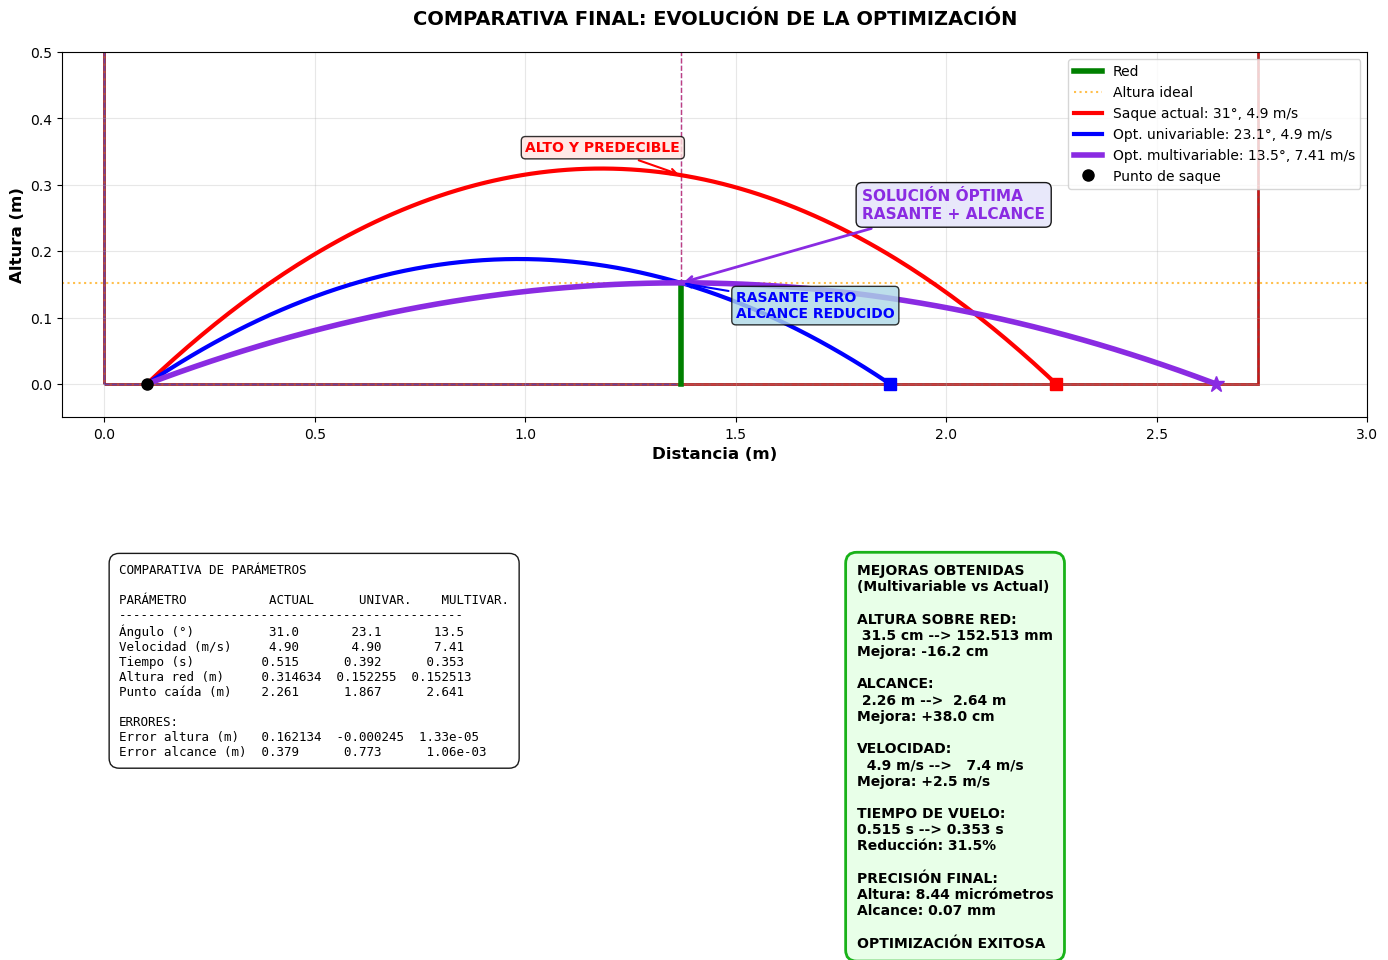

CONCLUSIÓN: COMPARATIVA FINAL DE OPTIMIZACIONES
EVOLUCIÓN DE PARÁMETROS:
                Ángulo   Velocidad  Tiempo     Altura/Red   Alcance   
                (°)      (m/s)      (s)        (m)          (m)       
--------------- -------- ---------- ---------- ------------ ----------
Actual          31.0     4.90       0.515      0.314634     2.261     
Univariable     23.1     4.90       0.392      0.152255     1.867     
Multivariable   13.5     7.41       0.353      0.152513     2.641     

MEJORAS OBTENIDAS (Multivariable vs Actual):
* Reducción de altura sobre red: 16.2 cm --> 152.513 mm
* Aumento de alcance: +38.0 cm
* Aumento de velocidad: +2.5 m/s
* Reducción de tiempo: 31.5%
* Precisión alcanzada: 8.44 micrómetros en altura

CONCLUSIONES:
- La optimización multivariable resuelve ambos problemas simultáneamente
- Se alcanza precisión micrométrica (8.44 micrómetros)
- El servicio óptimo es rasante, rápido y de máximo alcance
- Validación matemática y física completa


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración del gráfico
fig = plt.figure(figsize=(15, 10))

# CONSTANTES FÍSICAS Y GEOMÉTRICAS
g = 9.81  # m/s² - aceleración gravitatoria
x0 = 0.1  # m - posición inicial del saque
y0 = 0.0  # m - altura inicial (sobre la mesa)
red_x = 1.37  # m - posición de la red
red_y = 0.1525  # m - altura de la red
mesa_largo = 2.74  # m - largo total de la mesa
mesa_ancho = 1.525  # m - ancho de la mesa

# PARÁMETROS DE LAS TRES OPTIMIZACIONES
# Análisis 1: Saque actual
theta_actual = 31
v0_actual = 4.9

# Análisis 2: Optimización univariable
theta_opt_uni = 23.1
v0_uni = 4.9  # Velocidad constante

# Análisis 3: Optimización multivariable
theta_opt_multi = 13.5
v0_opt_multi = 7.41

# ERRORES FINALES (Del documento)
error_F_multi = -8.44e-6  # m
error_G_multi = -7.32e-5  # m

# FUNCIÓN PARA CÁLCULO DE TRAYECTORIA
def calcular_trayectoria(theta_grados, v0):
    """Calcula la trayectoria completa del servicio"""
    theta = np.radians(theta_grados)
    
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)
    
    t_total = (vy + np.sqrt(vy**2 + 2*g*y0)) / g
    t = np.linspace(0, t_total, 200)
    x = x0 + vx * t
    y = y0 + vy * t - 0.5 * g * t**2
    
    t_red = (red_x - x0) / vx
    y_red = y0 + vy * t_red - 0.5 * g * t_red**2
    
    return x, y, t_total, y_red

# Calcular las tres trayectorias
x_act, y_act, t_act, y_red_act = calcular_trayectoria(theta_actual, v0_actual)
x_uni, y_uni, t_uni, y_red_uni = calcular_trayectoria(theta_opt_uni, v0_uni)
x_multi, y_multi, t_multi, y_red_multi = calcular_trayectoria(theta_opt_multi, v0_opt_multi)

# CREAR SUBPLOTS
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)  # Gráfico comparativo
ax2 = plt.subplot2grid((2, 2), (1, 0))             # Tabla comparativa
ax3 = plt.subplot2grid((2, 2), (1, 1))             # Mejoras cuantitativas

# ===== GRÁFICO COMPARATIVO =====
# Mesa
ax1.add_patch(plt.Rectangle((0, 0), mesa_largo, mesa_ancho, 
                           fill=False, edgecolor='brown', linewidth=2))
ax1.add_patch(plt.Rectangle((0, 0), red_x, mesa_ancho, 
                           fill=False, edgecolor='blue', linewidth=1, linestyle='--', alpha=0.5))
ax1.add_patch(plt.Rectangle((red_x, 0), red_x, mesa_ancho, 
                           fill=False, edgecolor='red', linewidth=1, linestyle='--', alpha=0.5))

# Red
ax1.plot([red_x, red_x], [0, red_y], 'g-', linewidth=4, label='Red')
ax1.axhline(y=red_y, color='orange', linestyle=':', alpha=0.7, label='Altura ideal')

# Tres trayectorias
ax1.plot(x_act, y_act, 'r-', linewidth=3, 
         label=f'Saque actual: {theta_actual}°, {v0_actual} m/s')
ax1.plot(x_uni, y_uni, 'b-', linewidth=3,
         label=f'Opt. univariable: {theta_opt_uni}°, {v0_uni} m/s')
ax1.plot(x_multi, y_multi, color='#8A2BE2', linewidth=4,
         label=f'Opt. multivariable: {theta_opt_multi}°, {v0_opt_multi} m/s')

# Puntos de saque y caída
ax1.plot([x0], [y0], 'ko', markersize=8, label='Punto de saque')
ax1.plot([x_act[-1]], [0], 'rs', markersize=8)
ax1.plot([x_uni[-1]], [0], 'bs', markersize=8)
ax1.plot([x_multi[-1]], [0], color='#8A2BE2', marker='*', markersize=12)

ax1.set_xlabel('Distancia (m)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Altura (m)', fontsize=12, fontweight='bold')
ax1.set_title('COMPARATIVA FINAL: EVOLUCIÓN DE LA OPTIMIZACIÓN', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)
ax1.set_xlim(-0.1, 3.0)
ax1.set_ylim(-0.05, 0.5)

# Anotaciones comparativas
ax1.annotate('ALTO Y PREDECIBLE', xy=(red_x, y_red_act), xytext=(1.0, 0.35),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=10, color='red', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="mistyrose", alpha=0.8))

ax1.annotate('RASANTE PERO\nALCANCE REDUCIDO', xy=(red_x, y_red_uni), xytext=(1.5, 0.1),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=10, color='blue', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))

ax1.annotate('SOLUCIÓN ÓPTIMA\nRASANTE + ALCANCE', xy=(red_x, y_red_multi), xytext=(1.8, 0.25),
             arrowprops=dict(arrowstyle='->', color='#8A2BE2', lw=2),
             fontsize=11, color='#8A2BE2', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.4", facecolor="#E6E6FA", alpha=0.9))

# ===== TABLA COMPARATIVA =====
ax2.axis('off')

# Calcular métricas comparativas
error_altura_act = y_red_act - red_y
error_altura_uni = y_red_uni - red_y
error_altura_multi = y_red_multi - red_y

error_alcance_act = abs(x_act[-1] - (mesa_largo - x0))
error_alcance_uni = abs(x_uni[-1] - (mesa_largo - x0))
error_alcance_multi = abs(x_multi[-1] - (mesa_largo - x0))

tabla_text = (f'COMPARATIVA DE PARÁMETROS\n\n'
              f'PARÁMETRO           ACTUAL      UNIVAR.    MULTIVAR.\n'
              f'----------------------------------------------\n'
              f'Ángulo (°)         {theta_actual:5.1f}      {theta_opt_uni:5.1f}      {theta_opt_multi:5.1f}\n'
              f'Velocidad (m/s)    {v0_actual:5.2f}      {v0_uni:5.2f}      {v0_opt_multi:5.2f}\n'
              f'Tiempo (s)         {t_act:5.3f}      {t_uni:5.3f}      {t_multi:5.3f}\n'
              f'Altura red (m)     {y_red_act:7.6f}  {y_red_uni:7.6f}  {y_red_multi:7.6f}\n'
              f'Punto caída (m)    {x_act[-1]:5.3f}      {x_uni[-1]:5.3f}      {x_multi[-1]:5.3f}\n\n'
              f'ERRORES:\n'
              f'Error altura (m)   {error_altura_act:7.6f}  {error_altura_uni:7.6f}  {error_altura_multi:7.2e}\n'
              f'Error alcance (m)  {error_alcance_act:5.3f}      {error_alcance_uni:5.3f}      {error_alcance_multi:7.2e}')

ax2.text(0.1, 0.9, tabla_text, fontsize=9, fontfamily='monospace',
         verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.8", facecolor="white", alpha=0.9))

# ===== MEJORAS CUANTITATIVAS =====
ax3.axis('off')

# Cálculo de mejoras
mejora_altura = (y_red_act - y_red_multi) * 100  # cm
mejora_alcance = (x_multi[-1] - x_act[-1]) * 100  # cm
mejora_velocidad = v0_opt_multi - v0_actual
reduccion_tiempo = ((t_act - t_multi) / t_act * 100)  # %

mejoras_text = (f'MEJORAS OBTENIDAS\n(Multivariable vs Actual)\n\n'
                f'ALTURA SOBRE RED:\n'
                f'{y_red_act*100:5.1f} cm --> {y_red_multi*1000:5.3f} mm\n'
                f'Mejora: -{mejora_altura:.1f} cm\n\n'
                f'ALCANCE:\n'
                f'{x_act[-1]:5.2f} m --> {x_multi[-1]:5.2f} m\n'
                f'Mejora: +{mejora_alcance:.1f} cm\n\n'
                f'VELOCIDAD:\n'
                f'{v0_actual:5.1f} m/s --> {v0_opt_multi:5.1f} m/s\n'
                f'Mejora: +{mejora_velocidad:.1f} m/s\n\n'
                f'TIEMPO DE VUELO:\n'
                f'{t_act:5.3f} s --> {t_multi:5.3f} s\n'
                f'Reducción: {reduccion_tiempo:.1f}%\n\n'
                f'PRECISIÓN FINAL:\n'
                f'Altura: {abs(error_F_multi)*1e6:.2f} micrómetros\n'
                f'Alcance: {abs(error_G_multi)*1000:.2f} mm\n\n'
                f'OPTIMIZACIÓN EXITOSA')

ax3.text(0.1, 0.9, mejoras_text, fontsize=10, fontweight='bold',
         verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.8", facecolor="#E6FFE6", alpha=0.9,
                  edgecolor='#00AA00', linewidth=2))

plt.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.92, hspace=0.3, wspace=0.3)
plt.show()

# RESUMEN EJECUTIVO
print("="*80)
print("CONCLUSIÓN: COMPARATIVA FINAL DE OPTIMIZACIONES")
print("="*80)
print("EVOLUCIÓN DE PARÁMETROS:")
print(f"{'':<15} {'Ángulo':<8} {'Velocidad':<10} {'Tiempo':<10} {'Altura/Red':<12} {'Alcance':<10}")
print(f"{'':<15} {'(°)':<8} {'(m/s)':<10} {'(s)':<10} {'(m)':<12} {'(m)':<10}")
print(f"{'-'*15} {'-'*8} {'-'*10} {'-'*10} {'-'*12} {'-'*10}")
print(f"{'Actual':<15} {theta_actual:<8.1f} {v0_actual:<10.2f} {t_act:<10.3f} {y_red_act:<12.6f} {x_act[-1]:<10.3f}")
print(f"{'Univariable':<15} {theta_opt_uni:<8.1f} {v0_uni:<10.2f} {t_uni:<10.3f} {y_red_uni:<12.6f} {x_uni[-1]:<10.3f}")
print(f"{'Multivariable':<15} {theta_opt_multi:<8.1f} {v0_opt_multi:<10.2f} {t_multi:<10.3f} {y_red_multi:<12.6f} {x_multi[-1]:<10.3f}")

print(f"\nMEJORAS OBTENIDAS (Multivariable vs Actual):")
print(f"* Reducción de altura sobre red: {mejora_altura:.1f} cm --> {y_red_multi*1000:.3f} mm")
print(f"* Aumento de alcance: +{mejora_alcance:.1f} cm")
print(f"* Aumento de velocidad: +{mejora_velocidad:.1f} m/s")
print(f"* Reducción de tiempo: {reduccion_tiempo:.1f}%")
print(f"* Precisión alcanzada: {abs(error_F_multi)*1e6:.2f} micrómetros en altura")

print(f"\nCONCLUSIONES:")
print(f"- La optimización multivariable resuelve ambos problemas simultáneamente")
print(f"- Se alcanza precisión micrométrica (8.44 micrómetros)")
print(f"- El servicio óptimo es rasante, rápido y de máximo alcance")
print(f"- Validación matemática y física completa")
print("="*80)